<a href="https://colab.research.google.com/github/iuricimatec/depthmap/blob/main/depth_stereo_normalized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import required libraries
import numpy as np
import cv2
import os

# to mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

from matplotlib import pyplot as plt

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Comparing an image and its neighboor of the same camera.
# Left image paths
pathL = '/content/gdrive/MyDrive/MCTI/dataset/camera1/new/'
# Right image paths
pathR = '/content/gdrive/MyDrive/MCTI/dataset/camera2/new/'
print(os.listdir(pathL))
print(os.listdir(pathR))
# Potential fix 
# os.environ['OPENCV_IO_MAX_IMAGE_PIXELS']=str(2**64)

filenameL = pathL + '0021.png'
filenameR = pathR + '0021.png'



['0085.png', '1288.png', '2636.png', '3312.png', '0052.png', '1505.png', '2965.png', '2018.png', '0046.png', '1539.png', '2554.png', '2024.png', '1713.png', '1908.png', '1707.png', '1934.png', '2742.png', '0250.png', '2568.png', '2030.png', '2756.png', '1061.png', '2597.png', '3110.png', '1075.png', '3448.png', '0278.png', '0287.png', '2583.png', '3104.png', '0244.png', '1920.png', '0293.png', '2540.png', '3105.png', '2233.png', '1048.png', '1935.png', '0279.png', '0292.png', '1060.png', '2582.png', '1712.png', '1074.png', '3139.png', '2541.png', '2596.png', '3111.png', '3138.png', '2569.png', '2555.png', '1706.png', '1049.png', '2226.png', '2232.png', '2227.png', '0286.png', '2743.png', '2019.png', '2031.png', '1921.png', '0090.png', '3313.png', '1909.png', '1289.png', '3475.png', '3461.png', '1510.png', '3449.png', '0084.png', '1276.png', '3307.png', '1262.png', '1538.png', '0251.png', '0245.png', '2780.png', '2757.png', '1504.png', '2025.png', '2958.png', '2794.png', '1470.png', '29

In [ ]:
# read two input images
imgL = cv2.imread(filenameL,0)
imgR = cv2.imread(filenameR,0)


In [ ]:
# Setting parameters for StereoSGBM algorithm
minDisparity = 0;
numDisparities = 64;
blockSize = 8;
disp12MaxDiff = 1;
uniquenessRatio = 10;
speckleWindowSize = 10;
speckleRange = 8;

In [ ]:
# Creating an object of StereoSGBM algorithm
stereo = cv2.StereoSGBM_create(minDisparity = minDisparity,
        numDisparities = numDisparities,
        blockSize = blockSize,
        disp12MaxDiff = disp12MaxDiff,
        uniquenessRatio = uniquenessRatio,
        speckleWindowSize = speckleWindowSize,
        speckleRange = speckleRange
    ) 
 

In [ ]:
# Calculating disparith using the StereoSGBM algorithm
disp = stereo.compute(imgL, imgR).astype(np.float32)
disp = cv2.normalize(disp,0,255,cv2.NORM_MINMAX)


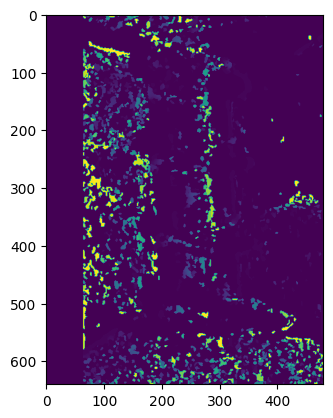

In [ ]:
plt.imshow(disp)
plt.show()